In [2]:
import os

In [3]:
import numpy as np

In [4]:
import cv2

In [5]:
import matplotlib.pyplot as plt

<hr>

## Load Image + Convert to Grayscale

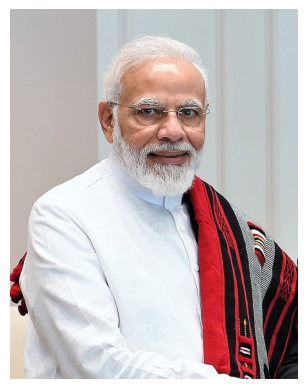

In [6]:
import cv2

# Load image
img = cv2.imread("modi.jpg")

# Convert to grayscale (Haar works ONLY on grayscale)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")      
plt.show()


## Load Haar Cascade Classifiers

In [7]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

eye_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_eye.xml"
)


## Detect Faces

In [8]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)


## Draw Face Bounding Boxes

In [9]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)


## ROI per Face → Detect Eyes

In [10]:
for (x, y, w, h) in faces:
    # Face rectangle
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Region of Interest (ROI)
    face_gray = gray[y:y+h, x:x+w]
    face_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(
        face_gray,
        scaleFactor=1.1,
        minNeighbors=10,
        minSize=(15, 15)
    )

    for (ex, ey, ew, eh) in eyes:
        center = (ex + ew//2, ey + eh//2)
        radius = ew // 5
        cv2.circle(face_color, center, radius, (0, 255, 0), 2)


## Single Face image

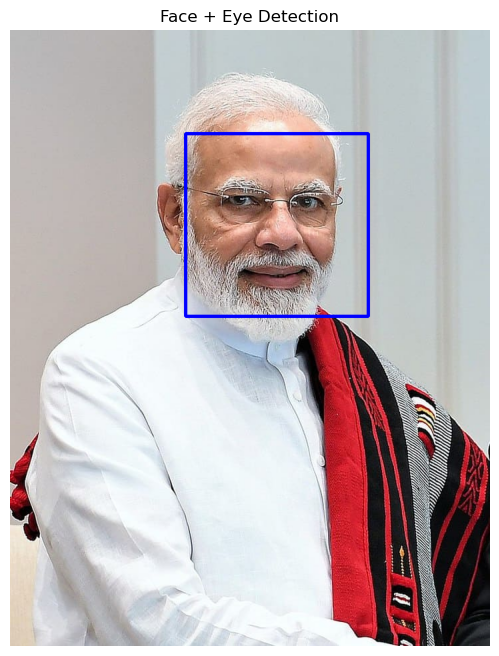

In [11]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Face + Eye Detection")
plt.show()


<hr>

## Single vs Grouped vs Roatated Face

In [12]:
def detect_face_eye(img_path, title):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)

        face_gray = gray[y:y+h, x:x+w]
        face_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(
            face_gray,
            scaleFactor=1.1,
            minNeighbors=10,
            minSize=(15, 15)
        )

        for (ex, ey, ew, eh) in eyes:
            center = (ex + ew//2, ey + eh//2)
            radius = ew // 5
            cv2.circle(face_color, center, radius, (0, 255, 0), 2)

    return img, title


In [20]:
img_single, t1 = detect_face_eye("modi.jpg", "Single Face")
img_group, t2 = detect_face_eye("group 1.jpg", "Group Photo")
img_rot, t3 = detect_face_eye("rotate photo.png", "Rotated Face")


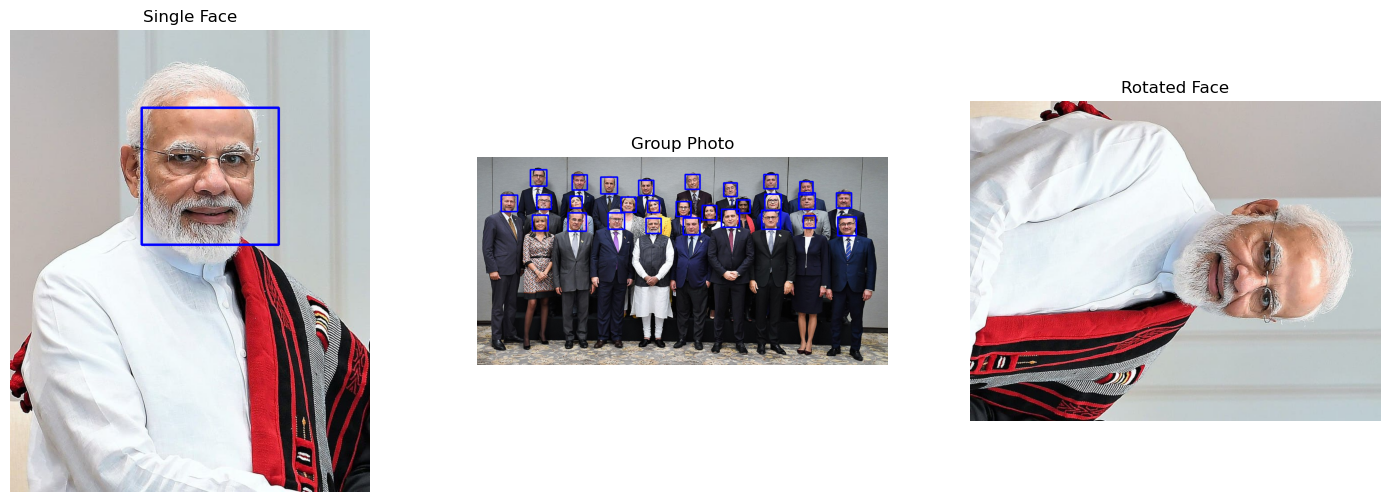

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (img, title) in zip(
    axs,
    [(img_single, t1), (img_group, t2), (img_rot, t3)]
):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis("off")

plt.show()


<hr>

## Play with scaleFactor, minNeighbors, minSize parameters → see false positives/misses​

In [22]:
def detect_faces_with_params(img_path, scaleFactor, minNeighbors, minSize):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=scaleFactor,
        minNeighbors=minNeighbors,
        minSize=minSize
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return img, len(faces)

### scaleFactor

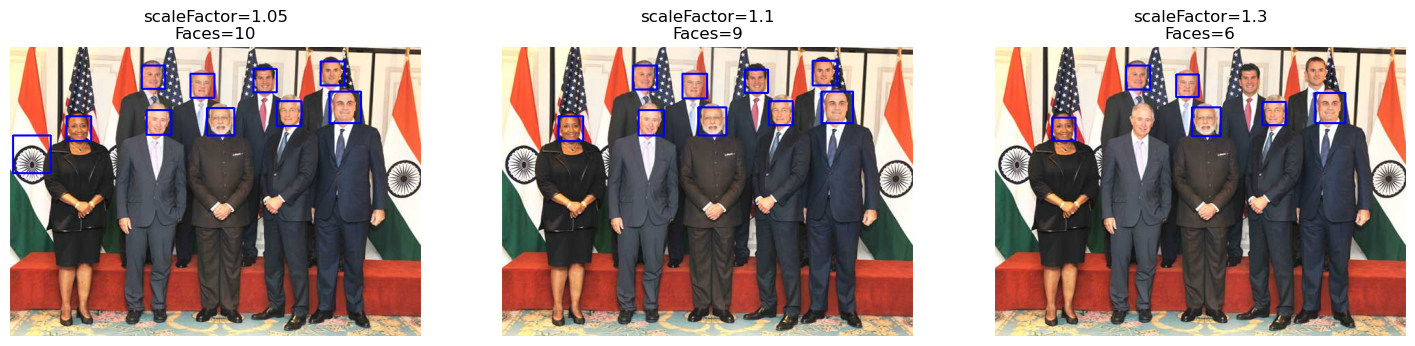

In [23]:
scale_factors = [1.05, 1.1, 1.3]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, sf in zip(axs, scale_factors):
    img_out, count = detect_faces_with_params(
        "group.jpg", sf, minNeighbors=5, minSize=(30,30)
    )
    ax.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    ax.set_title(f"scaleFactor={sf}\nFaces={count}")
    ax.axis("off")

plt.show()


### minNeighbors

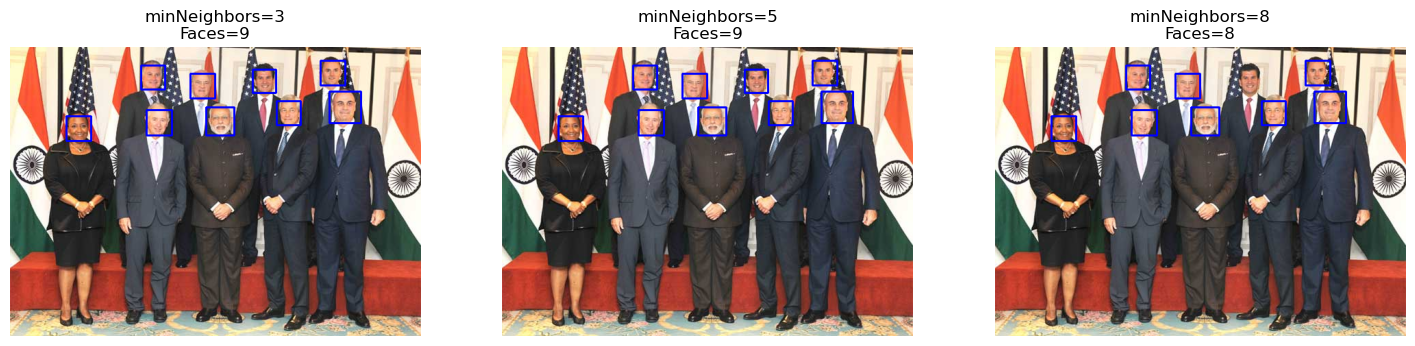

In [24]:
neighbors = [3, 5, 8]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, mn in zip(axs, neighbors):
    img_out, count = detect_faces_with_params(
        "group.jpg", scaleFactor=1.1, minNeighbors=mn, minSize=(30,30)
    )
    ax.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    ax.set_title(f"minNeighbors={mn}\nFaces={count}")
    ax.axis("off")

plt.show()


### minSize

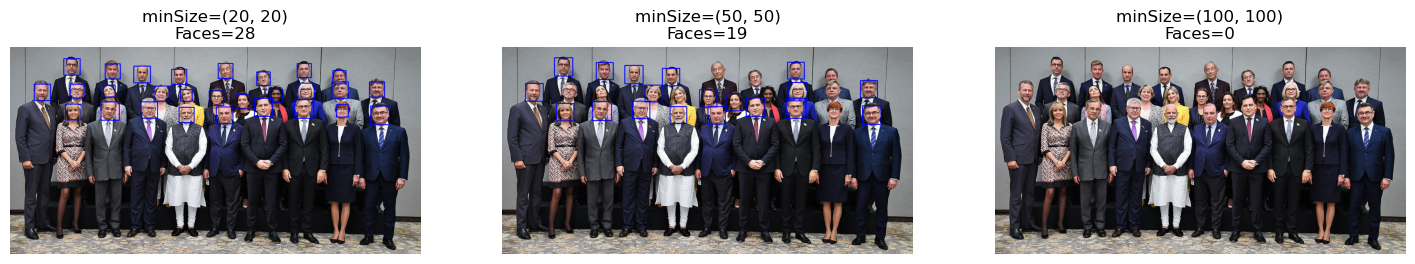

In [25]:
sizes = [(20,20), (50,50), (100,100)]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, ms in zip(axs, sizes):
    img_out, count = detect_faces_with_params(
        "group 1.jpg", scaleFactor=1.1, minNeighbors=5, minSize=ms
    )
    ax.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    ax.set_title(f"minSize={ms}\nFaces={count}")
    ax.axis("off")

plt.show()


<hr>